In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from zoobot.shared.schemas import desi_schema

In [6]:
# friendly = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/make_predictions/local_debug_friendly.parquet')  # x1
# advanced = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/make_predictions/local_debug_advanced.parquet')
# friendly = pd.read_parquet('/home/walml/repos/gz-decals-classifiers/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_friendly.parquet')
# advanced = pd.read_parquet('/home/walml/repos/gz-decals-classifiers/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_advanced.parquet')
# friendly = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/make_predictions/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_debug_friendly.parquet')
# advanced = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/make_predictions/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_debug_advanced.parquet')

# the big cheese
# friendly = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/make_predictions/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_friendly.parquet')
advanced = pd.read_parquet('/nvme1/scratch/walml/repos/desi-predictions/make_predictions/_desi_pytorch_v5_hpv2_train_all_notest_ml_catalog_x5_advanced.parquet')

In [7]:
advanced

,id_str,hdf5_loc,smooth-or-featured_smooth_fraction,smooth-or-featured_featured-or-disk_fraction,smooth-or-featured_artifact_fraction,disk-edge-on_yes_fraction,disk-edge-on_no_fraction,has-spiral-arms_yes_fraction,has-spiral-arms_no_fraction,bar_strong_fraction,...,spiral-arm-count_1_proportion-asked,spiral-arm-count_2_proportion-asked,spiral-arm-count_3_proportion-asked,spiral-arm-count_4_proportion-asked,spiral-arm-count_more-than-4_proportion-asked,spiral-arm-count_cant-tell_proportion-asked,merging_none_proportion-asked,merging_minor-disturbance_proportion-asked,merging_major-disturbance_proportion-asked,merging_merger_proportion-asked
0,388972_4019,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.825022,0.066724,0.108254,0.134090,0.865910,0.048580,0.951420,0.029790,...,0.002807,0.002807,0.002807,0.002807,0.002807,0.002807,1.0,1.0,1.0,1.0
1,388972_4570,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.099437,0.082280,0.818283,0.415216,0.584784,0.168731,0.831269,0.191117,...,0.008119,0.008119,0.008119,0.008119,0.008119,0.008119,1.0,1.0,1.0,1.0
2,388972_4156,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.866938,0.062072,0.070990,0.586247,0.413753,0.165788,0.834212,0.057375,...,0.004258,0.004258,0.004258,0.004258,0.004258,0.004258,1.0,1.0,1.0,1.0
3,388972_5110,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.832645,0.089720,0.077635,0.451347,0.548653,0.093705,0.906295,0.122665,...,0.004613,0.004613,0.004613,0.004613,0.004613,0.004613,1.0,1.0,1.0,1.0
4,388973_5576,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.886823,0.043317,0.069859,0.175408,0.824592,0.106414,0.893586,0.043498,...,0.003801,0.003801,0.003801,0.003801,0.003801,0.003801,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689365,444048_423,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.803408,0.079590,0.117002,0.126964,0.873036,0.068826,0.931174,0.041472,...,0.004782,0.004782,0.004782,0.004782,0.004782,0.004782,1.0,1.0,1.0,1.0
8689366,444048_424,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.719480,0.125088,0.155431,0.102985,0.897015,0.038304,0.961696,0.032586,...,0.004298,0.004298,0.004298,0.004298,0.004298,0.004298,1.0,1.0,1.0,1.0
8689367,444048_774,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.706206,0.236495,0.057299,0.645472,0.354528,0.337880,0.662120,0.078216,...,0.028329,0.028329,0.028329,0.028329,0.028329,0.028329,1.0,1.0,1.0,1.0
8689368,444048_663,_desi_pytorch_v5_hpv2_train_all_notest_all.hdf5,0.730944,0.206460,0.062596,0.686423,0.313577,0.116241,0.883760,0.051667,...,0.007526,0.007526,0.007526,0.007526,0.007526,0.007526,1.0,1.0,1.0,1.0


In [ ]:
# TODO filter to low redshift

In [54]:
advanced['smooth-or-featured_smooth_90pc-lower']

0          0.763709
1          0.027885
2          0.806452
3          0.764284
4          0.833143
             ...   
8689365    0.733964
8689366    0.640066
8689367    0.631868
8689368    0.657499
8689369    0.757306
Name: smooth-or-featured_smooth_90pc-lower, Length: 8689370, dtype: float64

In [55]:
labels = pd.read_parquet('/nvme1/scratch/walml/repos/gz-decals-classifiers/data/catalogs/training_catalogs/dr8_ortho_v5_labelled_catalog.parquet')
# labels = pd.read_parquet('/home/walml/repos/gz-decals-classifiers/data/catalogs/dr8_ortho_v5_labelled_catalog.parquet')
labels

,smooth-or-featured-dr8_artifact,smooth-or-featured-dr8_featured-or-disk,smooth-or-featured-dr8_smooth,how-rounded-dr8_cigar-shaped,how-rounded-dr8_in-between,how-rounded-dr8_round,disk-edge-on-dr8_no,disk-edge-on-dr8_yes,edge-on-bulge-dr8_boxy,edge-on-bulge-dr8_none,...,spiral-arm-count-dr5_3,spiral-arm-count-dr5_4,spiral-arm-count-dr5_more-than-4,spiral-arm-count-dr5_cant-tell,merging-dr5_total-votes,merging-dr5_none,merging-dr5_minor-disturbance,merging-dr5_major-disturbance,merging-dr5_merger,id_str
0,2.0,10.0,16.0,0.0,7.0,9.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,107510_4476
1,2.0,1.0,31.0,0.0,0.0,31.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,224436_1680
2,2.0,21.0,17.0,13.0,3.0,1.0,1.0,20.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,284364_3207
3,5.0,3.0,21.0,1.0,20.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,308830_1267
4,6.0,1.0,5.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,72843_2395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96131,5.0,11.0,16.0,2.0,12.0,2.0,10.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,119393_2346
96132,1.0,15.0,23.0,9.0,14.0,0.0,5.0,10.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,314347_6899
96133,1.0,0.0,21.0,4.0,8.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,488094_2517
96134,4.0,2.0,18.0,0.0,2.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,102240_2120


In [56]:
labels = labels[[col for col in labels if 'dr8' in col] + ['id_str']]
labels = labels.rename(columns=dict(zip(labels.columns.values, [col.replace('-dr8', '') for col in labels.columns.values])))

for q in desi_schema.questions:
    labels[q.text + '_total-votes'] = labels[[a.text for a in q.answers]].sum(axis=1)
    for a in q.answers:
        labels[a.text + '_fraction'] = labels[a.text] / labels[q.text + '_total-votes']

In [57]:
advanced = pd.merge(advanced, labels, on='id_str', how='inner', suffixes=('_ml', '_vol'))
advanced = advanced[advanced['smooth-or-featured_total-votes'] >=36]
len(advanced)

54260

In [79]:
def show_errorbars(df, answer, max_galaxies=100):

    df = df.sample(min(len(df), max_galaxies)).sort_values(answer.text + '_fraction_vol')
    
    i = np.arange(len(df))
    plt.errorbar(
        x=i,
        y=df[answer.text + '_fraction_ml'],
        yerr=(df[answer.text + '_fraction_ml']-df[answer.text + '_90pc-lower'], df[answer.text + '_90pc-upper']-df[answer.text + '_fraction_ml']),
        marker='.',
        # markersize=10.,
        linestyle='')

    plt.scatter(i, df[answer.text + '_fraction_vol'], color='r', marker='.')
    plt.ylim([0., 1.])
    plt.ylabel(f'Vol {answer.text} fraction')
    plt.xlabel('Galaxy')

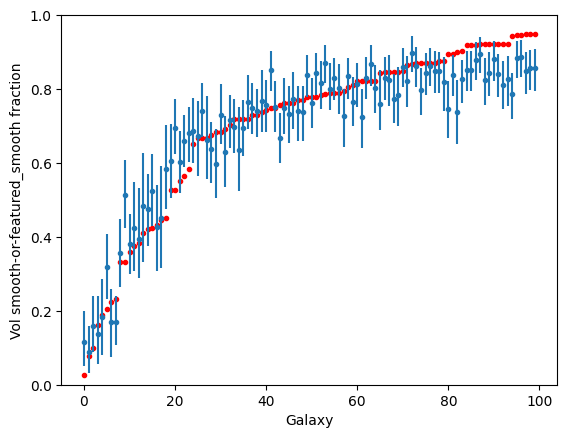

In [80]:

show_errorbars(advanced, answer=desi_schema.get_answer('smooth-or-featured_smooth'))

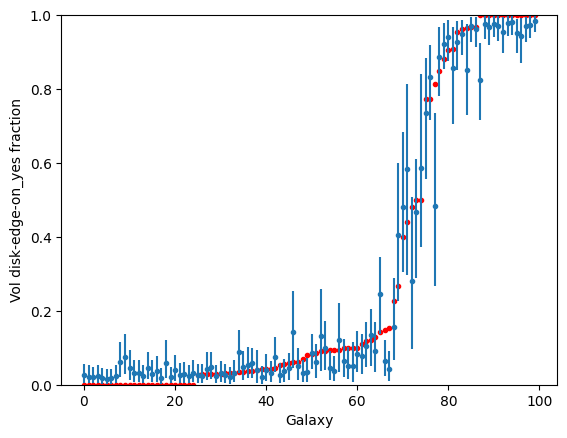

In [81]:
# temp = advanced.sort_values('smooth-or-featured_smooth_fraction')  # ml
temp = advanced.sort_values('disk-edge-on_yes_fraction_vol')  # vols, calc above
temp = temp[temp['smooth-or-featured_featured-or-disk_fraction_vol'] > .5]

show_errorbars(temp, answer=desi_schema.get_answer('disk-edge-on_yes'))

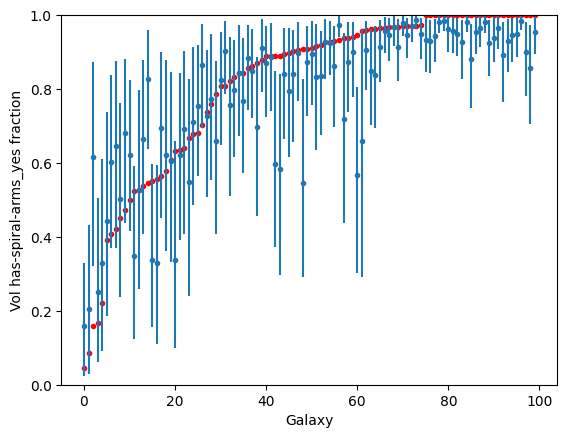

In [82]:
temp = advanced.sort_values('has-spiral-arms_yes_fraction_vol')
temp = temp[temp['has-spiral-arms_total-votes'] >= 18]


show_errorbars(temp, answer=desi_schema.get_answer('has-spiral-arms_yes'))


In [78]:
# TODO disk edge on and spiral arms as example figures showing uncertainties

In [62]:
temp['smooth-or-featured_smooth_fraction_vol']

56544    0.384615
49725    0.350000
49892    0.282051
51438    0.400000
37716    0.361111
           ...   
21209    0.000000
73307    0.000000
55104    0.000000
55123    0.055556
11876    0.243243
Name: smooth-or-featured_smooth_fraction_vol, Length: 6434, dtype: float64

In [63]:
temp.iloc[-4]['id_str']

'294483_2948'

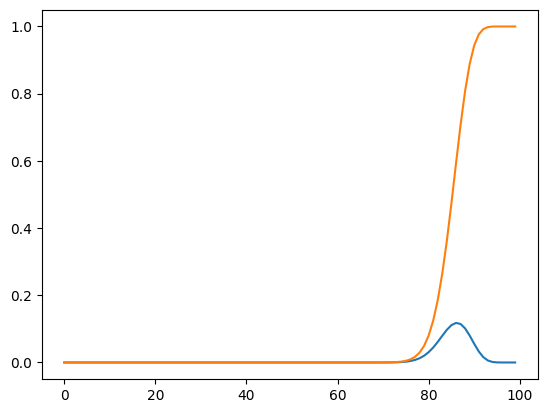

In [64]:
concentrations = np.array([[[92.18843,   91.6925,    91.49667,   96.85471,   86.715965 ]],

 [[ 7.303921,   6.666026,   7.1709514,  5.68773,    6.582647 ]],

 [[ 8.738571,   7.692705,   8.463262,   8.035879,   6.2074027]]])

# concentrations = np.expand_dims(concentrations, axis=1)
concentrations = concentrations.transpose(1, 0, 2)
# concentrations.shape

from zoobot.shared import stats

grid, pdf, cdf = stats.beta_mixture_on_grid(concentrations, 0, gridsize=100)
plt.plot(pdf[0])
plt.plot(cdf[0])


In [65]:
stats.get_confidence_interval_from_binned_dist(grid, pdf, cdf, interval_width=.95)

(array([1.e-08]), array([0.9090909]))

In [66]:
stats.get_confidence_interval_from_binned_dist(grid, pdf, cdf, interval_width=.9)

(array([0.78787878]), array([0.9090909]))

In [67]:
temp['smooth-or-featured_smooth_95pc-lower']

KeyError: 'smooth-or-featured_smooth_95pc-lower'

In [ ]:
temp['smooth-or-featured_smooth_95pc-upper']

6     0.656566
57    0.747475
37    0.393939
22    0.717172
33    0.424242
41    0.464646
30    0.616162
43    0.868687
19    0.666667
14    0.757576
32    0.787879
44    0.808081
8     0.858586
34    0.838384
17    0.858586
3     0.979798
25    0.878788
39    0.878788
52    0.909091
36    0.888889
13    0.989899
21    0.989899
40    0.919192
4     0.898990
7     0.989899
45    0.919192
56    0.919192
50    0.898990
0     0.919192
47    0.909091
28    0.989899
9     0.989899
29    0.989899
Name: smooth-or-featured_smooth_95pc-upper, dtype: float64